# Лабораторная работа

In [1]:
# Подключение нужных модулей
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd
import os
import seaborn
from pandas.plotting import scatter_matrix
import sklearn

## Загружаем данные:

In [2]:
# Чтение csv файла
data = pd.read_csv("./SkyObjects.csv")

Вначале посмотрим на размеры таблицы - количество строк и количество столбцов:

In [3]:
# Размерность таблицы
data.shape

(10000, 18)

In [4]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Количество строк - число наблюдений за космосом. Столбцы: один столбец характеризует, чем является космический объект, звезда, галактика или квазар, и остальные 17 столбцов характерезируют каждое наблюдений характиристиками.

In [5]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [6]:
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


Таблица содержит фотометрические и спектральные данные.

Посмотреть "PhotoObj"
objid = Идентификатор объекта
ra = Прямое восхождение J2000 (r-диапазон)
dec = склонение J2000 (r-диапазон)
Прямое восхождение - это угловое расстояние,
измеренное на восток вдоль небесного экватора от Солнца в момент мартовского равноденствия до часовой окружности рассматриваемой точки над землей. 
В сочетании с склонением эти астрономические координаты определяют направление точки на небесной сфере в экваториальной системе координат.

u = лучшее соответствие по величине DeV/Exp 
g = лучшее соответствие по величине DeV /Exp 
r = лучшее соответствие по величине DeV/Exp
i = лучшеесоответствие по величине DeV/Exp 
z = лучшее соответствие по величине DeV/Exp
Система астрономических величин Туана-Ганна. u, g, r, i, z представляют отклик 5 диапазонов телескопа.

run = Номер
rerun = Номер повторного
camcol = Поле столбца камеры
field = Номер поля

specobjid = Идентификатор объекта
class = класс объекта (объект галактики, звезды или квазара)
Класс определяет объект как галактику, звезду или квазар. Это будет переменная отклика, которую мы попытаемся предсказать.

redshift = красное смещение
plate number = номер пластины
mjd = MJD объекта наблюдения
fiberid = идентификатор волокна

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


<AxesSubplot: xlabel='class', ylabel='count'>

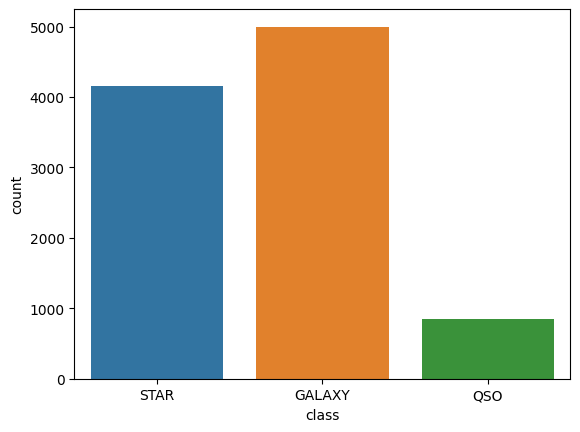

In [8]:
seaborn.countplot(x="class", data = data)

<AxesSubplot: xlabel='camcol', ylabel='count'>

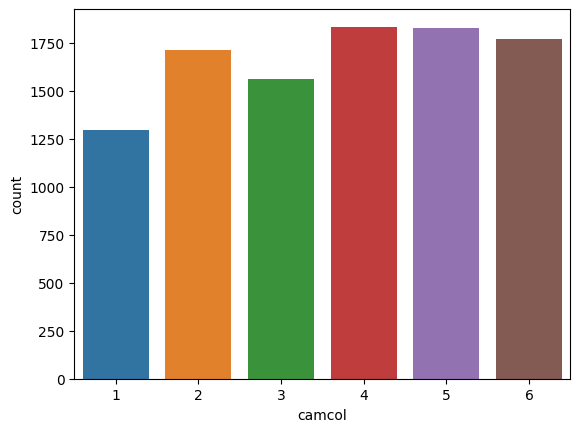

In [9]:
seaborn.countplot(x="camcol", data = data)

## Проверка на пропущенные значения

In [10]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

## Графики зависимости от признака redshift

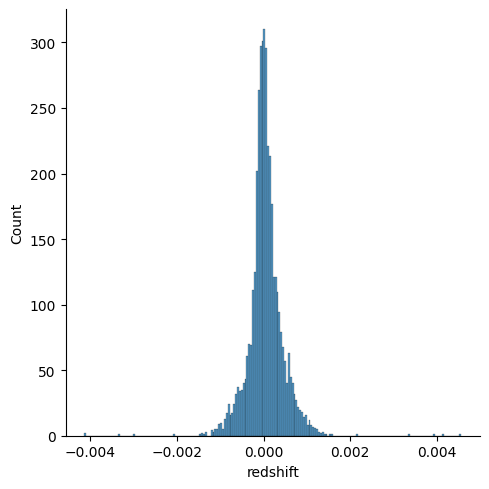

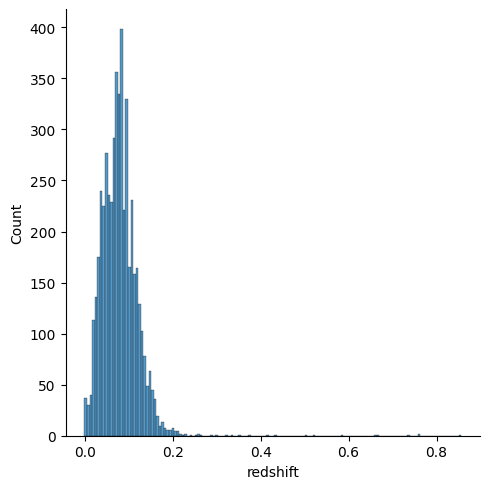

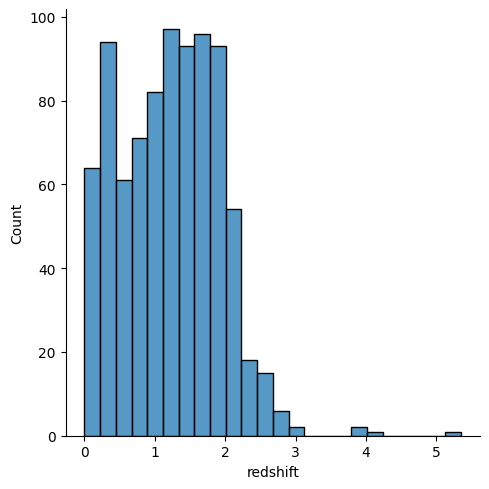

In [11]:
star = data[data['class']=='STAR']['redshift']
galaxy = data[data['class']=='GALAXY']['redshift']
quasar = data[data['class']=='QSO']['redshift']

seaborn.displot(star)
seaborn.displot(galaxy)
seaborn.displot(quasar)
plt.show()

<AxesSubplot: xlabel='class', ylabel='redshift'>

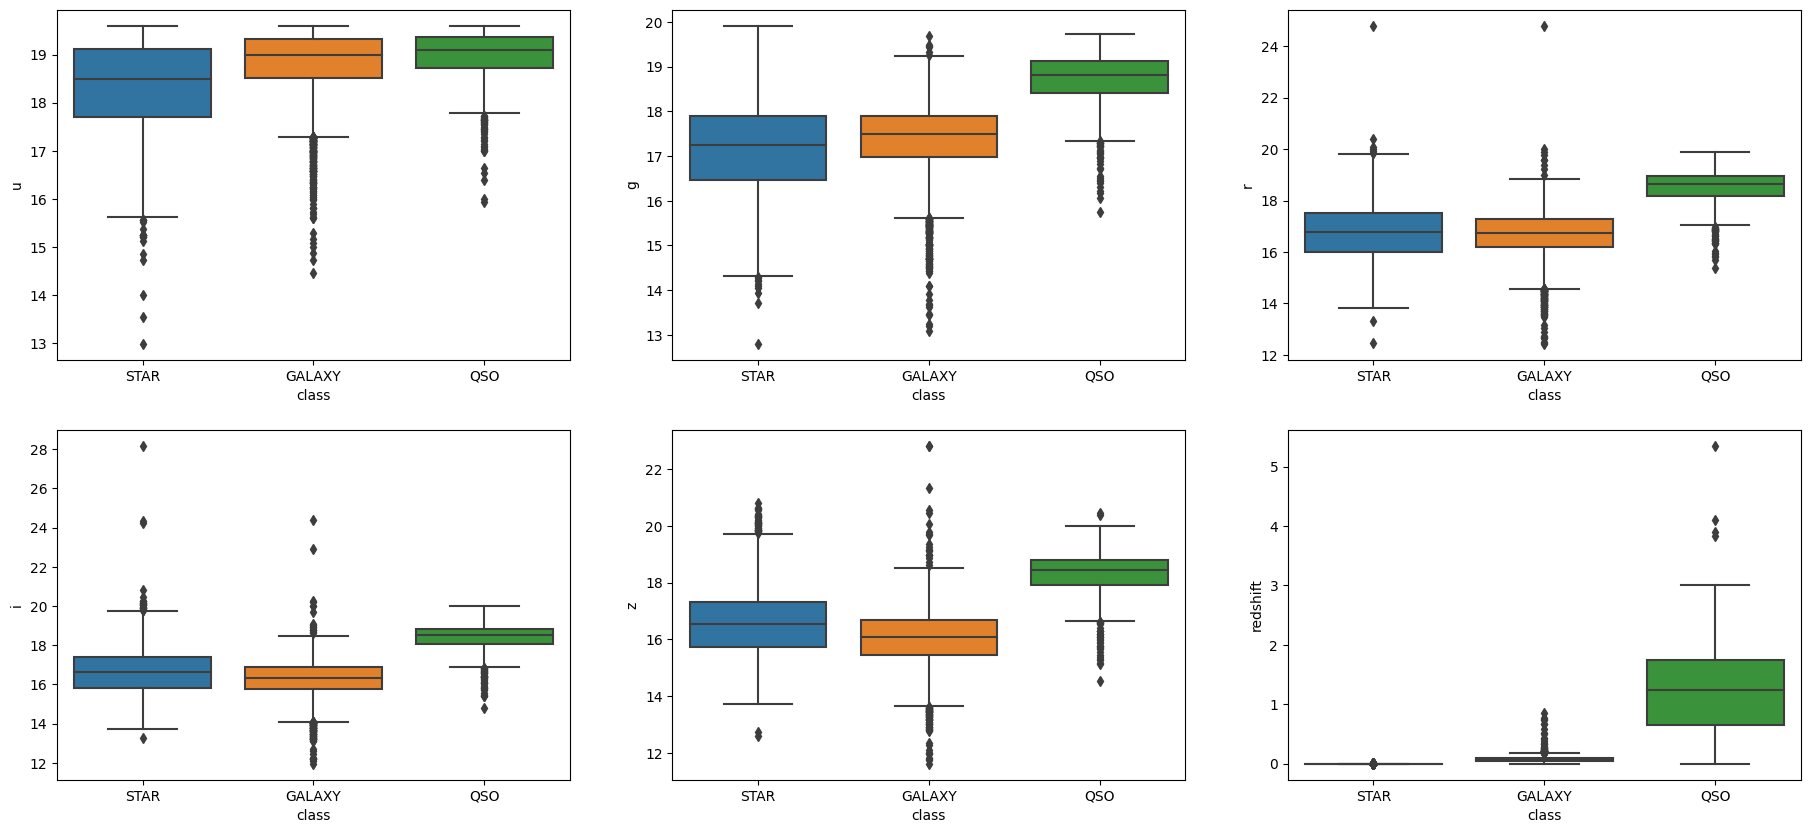

In [12]:
f, axs = plt.subplots(2,3, figsize=(22.5,10))
seaborn.boxplot(data=data, y='u', x='class', ax=axs[0, 0])
seaborn.boxplot(data=data, y='g', x='class', ax=axs[0, 1])
seaborn.boxplot(data=data, y='r', x='class', ax=axs[0, 2])
seaborn.boxplot(data=data, y='i', x='class', ax=axs[1, 0])
seaborn.boxplot(data=data, y='z', x='class', ax=axs[1, 1])
seaborn.boxplot(data=data, y='redshift', x='class', ax=axs[1, 2])

## Диаграммы рассеивания

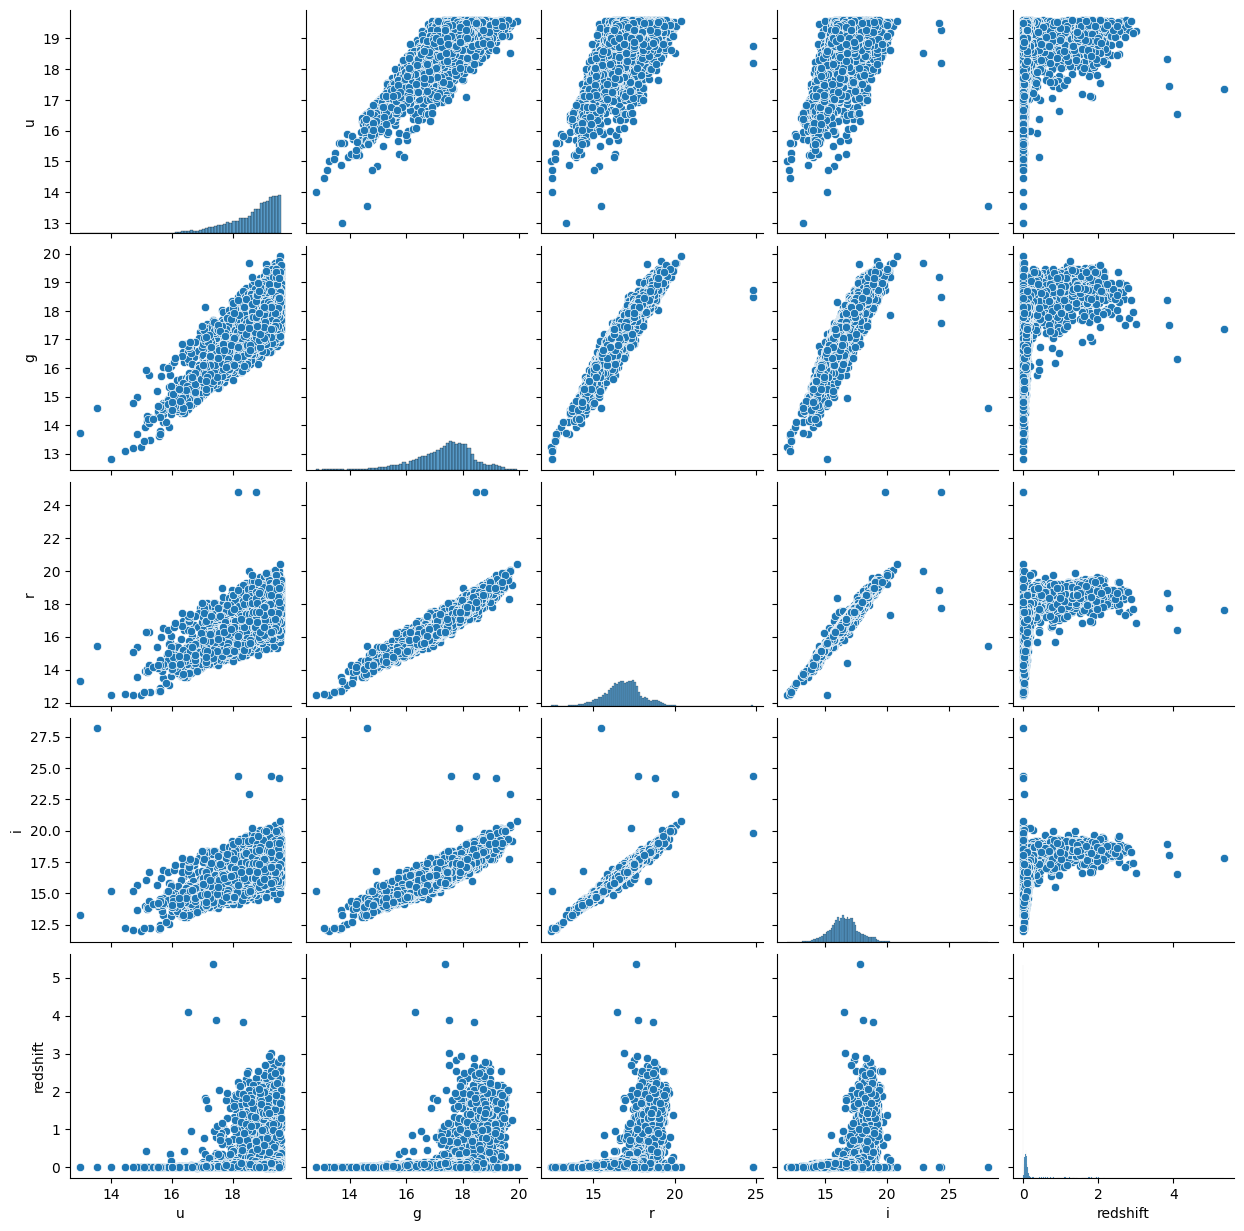

In [13]:
seaborn.pairplot(data[['u','g','r','i', 'redshift']])

## Подготовка данных

In [14]:
data.drop(columns=['objid','specobjid', 'rerun'], inplace=True)
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512


In [15]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

data.corr(method=histogram_intersection)

C:\Users\Sergey\AppData\Local\Temp\ipykernel_7972\1604387218.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method=histogram_intersection)


,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
ra,1.0,147832.6,185019.9,172776.9,167565.8,165036.8,163456.0,1755299.9,36487.0,1605102.3,1437.3,1755299.9,1755299.9,1544059.2
dec,147832.6,1.0,50895.9,47862.4,46558.2,45899.6,45496.7,148361.5,8911.1,145143.1,-3221.7,148361.5,148361.5,146137.2
u,185019.9,50895.9,1.0,173692.4,168329.3,165695.7,164070.2,186193.6,36487.0,185397.8,1437.3,186193.6,186193.6,183661.1
g,172776.9,47862.4,173692.4,1.0,168306.3,165647.4,164003.2,173719.3,36487.0,173162.2,1437.3,173719.3,173719.3,171531.1
r,167565.8,46558.2,168329.3,168306.3,1.0,165713.2,164062.2,168409.6,36487.0,167936.7,1437.3,168409.6,168409.6,166357.1
i,165036.8,45899.6,165695.7,165647.4,165713.2,1.0,164113.8,165835.8,36487.0,165398.1,1437.3,165835.8,165835.8,163848.0
z,163456.0,45496.7,164070.2,164003.2,164062.2,164113.8,1.0,164228.3,36487.0,163808.5,1437.3,164228.3,164228.3,162276.0
run,1755299.9,148361.5,186193.6,173719.3,168409.6,165835.8,164228.3,1.0,36487.0,3023801.0,1437.3,5733825.0,9810348.0,3508912.0
camcol,36487.0,8911.1,36487.0,36487.0,36487.0,36487.0,36487.0,36487.0,1.0,36487.0,1381.7,36487.0,36487.0,36461.0
field,1605102.3,145143.1,185397.8,173162.2,167936.7,165398.1,163808.5,3023801.0,36487.0,1.0,1437.3,2644932.0,3023801.0,2166768.0


In [16]:
def change_category (type):
    if type == 'STAR':
        return 0
    elif type == 'GALAXY':
        return 1 
    else :
        return 2
data['classtype'] = data['class'].apply(change_category)
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid,classtype
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491,0
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512,0


In [17]:
data.drop(columns='class',inplace=True)
X = data.drop(columns='classtype')
y = data['classtype']
X.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


## Нормализация

In [18]:
X = (X-X.mean(axis=0))/X.std(axis = 0)
X.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.955858e-16,-4.547474e-17,4.323297e-15,-1.294609e-15,6.892265e-17,-2.734168e-15,2.415845e-16,-1.250555e-16,2.842171e-17,-1.733724e-16,5.968559e-17,1.207923e-17,-1.840306e-15,1.278977e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.501106e+00,-8.019441e-01,-6.794599e+00,-4.836159e+00,-4.129529e+00,-4.060562e+00,-3.999727e+00,-2.462577e+00,-1.589681e+00,-1.792251e+00,-3.803284e-01,-6.680461e-01,-9.036381e-01,-1.706605e+00
25%,-3.800279e-01,-6.098309e-01,-5.325737e-01,-5.889547e-01,-6.252604e-01,-6.392286e-01,-6.686803e-01,-8.380190e-01,-9.895071e-01,-7.281445e-01,-3.694815e-01,-6.484797e-01,-6.905554e-01,-8.062089e-01
50%,1.018036e-01,-5.724204e-01,2.820708e-01,1.303110e-01,1.667660e-02,-2.504303e-02,-2.733418e-02,-8.233833e-01,2.108412e-01,-2.079067e-02,-2.601383e-01,-5.702140e-01,-6.263659e-01,-1.003111e-02
75%,5.444835e-01,8.255227e-01,7.721867e-01,6.750316e-01,6.290823e-01,5.911437e-01,5.972585e-01,1.280493e+00,8.110153e-01,6.865631e-01,-1.315602e-01,6.138343e-01,1.008812e+00,7.606981e-01
max,1.786276e+00,2.130163e+00,1.183295e+00,2.693976e+00,7.455837e+00,1.015590e+01,5.327702e+00,1.576865e+00,1.411189e+00,2.863983e+00,1.340143e+01,3.884782e+00,3.002657e+00,3.135901e+00


## Разобьем данные на обучающую и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

print(N_train, N_test)

7000 3000


## Классификатор соседей

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
def Classifier(param):
    knn = KNeighborsClassifier(n_neighbors = param)
    knn.fit(X_train, y_train)

    y_test_predict = knn.predict(X_test)
    knn_acc = knn.score(X_test,y_test)
    err_test = np.mean(y_test  != y_test_predict)

    print("Accuracy: ", knn_acc)
    print("Error: ", err_test)
    print(confusion_matrix(y_test, y_test_predict))
    print()

Classifier(3)
Classifier(10)
Classifier(25)

Accuracy:  0.897
Error:  0.103
[[1051  164    2]
 [ 102 1394    1]
 [  14   26  246]]

Accuracy:  0.899
Error:  0.101
[[1036  180    1]
 [  75 1420    2]
 [  16   29  241]]

Accuracy:  0.884
Error:  0.116
[[ 969  247    1]
 [  50 1447    0]
 [  18   32  236]]



## Метод опорных векторов

In [21]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_test_predict = svc.predict(X_test)
svc_acc = svc.score(X_test, y_test)
err_test = np.mean(y_test  != y_test_predict)

print("Accurancy: ", svc_acc)
print("Error: ", err_test)
print(confusion_matrix(y_test, y_test_predict))

Accurancy:  0.9806666666666667
Error:  0.019333333333333334
[[1209    8    0]
 [  38 1455    4]
 [   0    8  278]]


## Избавление от несбалансированны классов:

<AxesSubplot: xlabel='classtype', ylabel='count'>

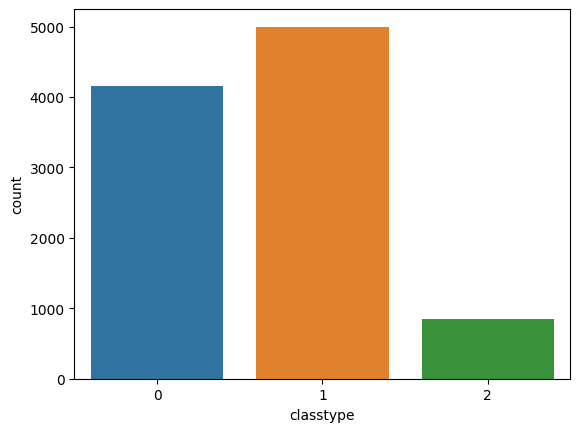

In [22]:
seaborn.countplot(x='classtype', data=data)

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 421)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {}\n".format(sum(y_train == 2)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("Before OverSampling, counts of label '2': {}\n".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '0': 2935
Before OverSampling, counts of label '1': 3501
Before OverSampling, counts of label '2': 564

After OverSampling, counts of label '0': 3501
After OverSampling, counts of label '1': 3501
Before OverSampling, counts of label '2': 3501



In [24]:
Classifier(10)

Accuracy:  0.899
Error:  0.101
[[1036  180    1]
 [  75 1420    2]
 [  16   29  241]]



## Нейронная сеть

## Подбор гиперпараметров. Нейронная сеть с одним слоем

In [28]:
from sklearn.neural_network import MLPClassifier

alpha_arr  = np.arange(3, 50, 2)
train_err = [] 
test_err = []

optimal_num_for_neural_one = None
optimal_num_for_neural_two = None

def neuralnet(alpha_arr, max_it, rand_state, neural_layer_two = False):
    for alpha in alpha_arr:
        hid_layer = None
        if(neural_layer_two == False):
            hid_layer = (alpha,)
        else:
            hid_layer = (optimal_num_for_neural_one, alpha,)
            

        mlp_model = MLPClassifier(hidden_layer_sizes = hid_layer, max_iter=max_it, random_state = rand_state)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        
neuralnet(alpha_arr, 1000, 421)

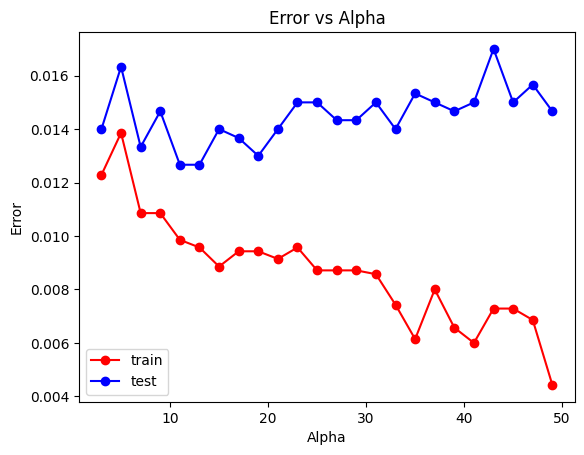

In [30]:
plt.plot(alpha_arr, train_err, 'r-o', label = 'train')
plt.plot(alpha_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

## Минимальное значение ошибки

In [31]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.004428571428571428 0.012666666666666666


## Оптимальное число нейронов для сети с одним слоем

In [33]:
optimal_num_for_neural_one = alpha_arr[test_err == min_test_err][0]
print(optimal_num_for_neural_one)

11


## Нейронная сеть с двумя слоями

In [34]:
alpha_arr = np.arange(1, 50, 2)
train_err = [] 
test_err = []

neuralnet(alpha_arr, 1000, 421, True)

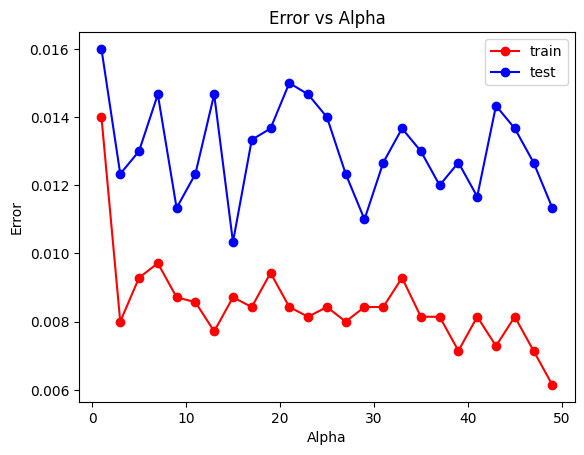

In [35]:
plt.plot(alpha_arr, train_err, 'r-o', label = 'train')
plt.plot(alpha_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

## Минимальное значение ошибки

In [36]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.006142857142857143 0.010333333333333333


## Оптимальное число нейронов для сети с двями слоями

In [37]:
optimal_num_for_neural_two = alpha_arr[test_err == min_test_err][0]
print(optimal_num_for_neural_two)

15


## Оптимальный параметр для alpha сети с двумя слоями

In [40]:
from sklearn.metrics import accuracy_score

alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes = (optimal_num_for_neural_one, optimal_num_for_neural_two), 
                              max_iter=1000,
                              random_state = 421)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

## Как менялась метрика в зависимости от гиперпараметра

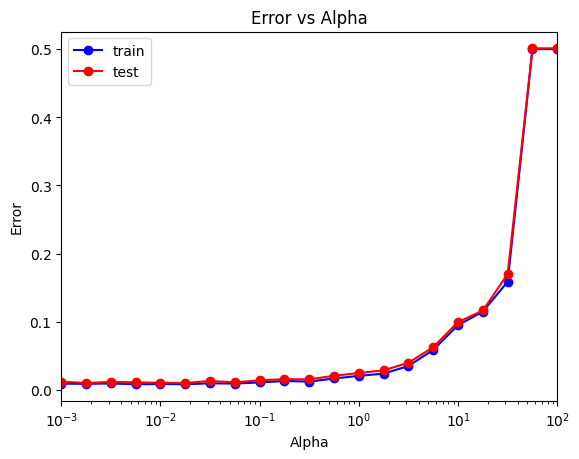

In [41]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

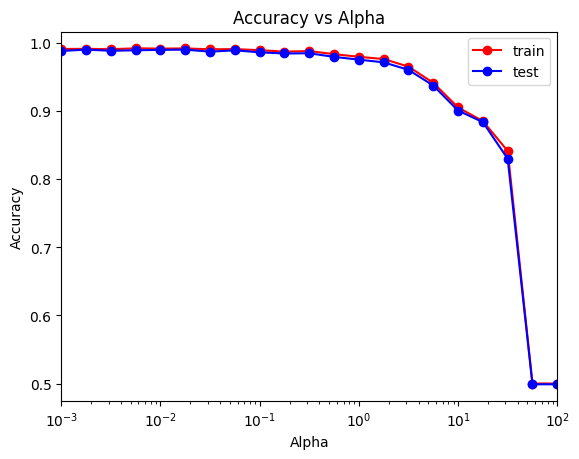

In [42]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()

## Минимальное значение ошибки

In [43]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.00842857142857143 0.010333333333333333


## Оптимальное значение alpha

In [44]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

0.0017782794100389228


## Классификатор при найденном оптимальном значении alpha

In [46]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (optimal_num_for_neural_one, optimal_num_for_neural_two), 
                          max_iter=1000,
                          random_state = 421)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.009142857142857144
0.010333333333333333


## Матрица рассогласования

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1215   17    0]
 [   2 1476    8]
 [   0    4  278]]


## Другие метрики качества